# Дектирование объектов

## Практическое задание


<ol>
    <li>Сделайте краткий обзор какой-нибудь научной работы посвященной тому или иному алгоритму для object detection, который не рассматривался на уроке. Проведите анализ: Чем отличается выбранная вами на рассмотрение архитектура нейронной сети от других архитектур? В чем плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при применении данной архитектуры на практике?
    </li> 
    <li>Запустите детектор (ssdMobile_v2 или faster_rcnn, или любой другой детектор) для своей картинки и попробуйте найти 10 объектов, 100 объектов.
    </li>
    <li>* Ссылка на репозиторий с полным кодом для обучения ssd нейросети - https://github.com/sergeyveneckiy/ssd-tensorflow. Попробуйте улучшить точность ее работы и напишите отчет, что вы пробовали изменить в ее параметрах и как это отражалось на процессе обучения нейронной сети. 
        Обратите внимание! Мин. сист. требования для запуска данного проекта - это минимум 8 Gb ОЗУ. Если у вас недостаточно мощности компьютера, то вы можете просто изучить содержимое исходного кода и датасета данного проекта.</li>

</ol>

### Задание №1.

**Источник** - https://habr.com/ru/post/514450/

https://pjreddie.com/media/files/papers/YOLOv3.pdf

**YOLO (You Only Look Once) — отличный object detector**

Сразу нужно сделать очень важную пометку, которую нужно запомнить — Object Detection это не Object Tracking. Для многих это не будет новостью, но часто люди путают эти понятия. Простыми словами:

Object Detection — это просто определение объектов на картинке/кадре. То есть алгоритм или нейронная сеть определяют объект и записывают его позицию и bounding boxes (параметры прямоугольников вокруг объектов). Пока что речи о других кадрах не идет, и алгоритм работает только с одним.

Object Tracking — здесь совсем другое дело. Здесь задача не просто определить объекты на кадре, но еще и связать информацию с предыдущих кадров таким образом, чтобы не терять объект, или сделать его уникальным.

То есть Object Tracker включает в себя Object Detection для определения объектов, и другие алгоритмы для понимания какой объект на новом кадре принадлежит какому из предыдущего кадра.

Поэтому Object Detection играет очень важную роль в задаче трэкинга.

Почему YOLO? Да потому что YOLO считается эффективнее многих других алгоритмов для определения объектов. Вот небольшой график для сравнения от создателей YOLO:

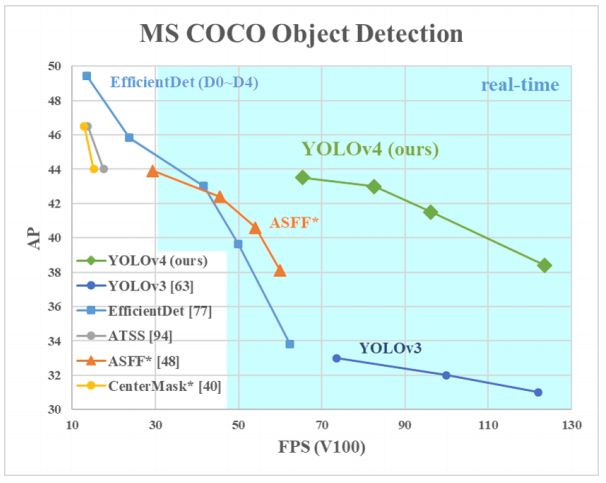

**Архитектуры разных Object Detectors**

Итак, существует несколько архитектур нейронных сетей, созданных для определения объектов. Они в основном разделяются на «двухуровневые», такие как RCNN, fast RCNN и faster RCNN, и «одноуровневые», такие как YOLO.

«Двухуровневые» нейронные сети, перечисленные выше, используют так называемые регионы на картинке, чтобы определить, находится ли в этом регионе определенный объект.

Обычно это выглядит так (для faster RCNN, которая является самой быстрой из перечисленных двухуровневых систем):

Подается картинка/кадр на вход
Кадр прогоняется через CNN для формирования feature maps
Отдельной нейронной сетью определяются регионы с высокой вероятностью нахождения в них объектов
Дальше эти регионы с помощью RoI pooling сжимаются и подаются в нейронную сеть, определяющую класс объекта в регионах



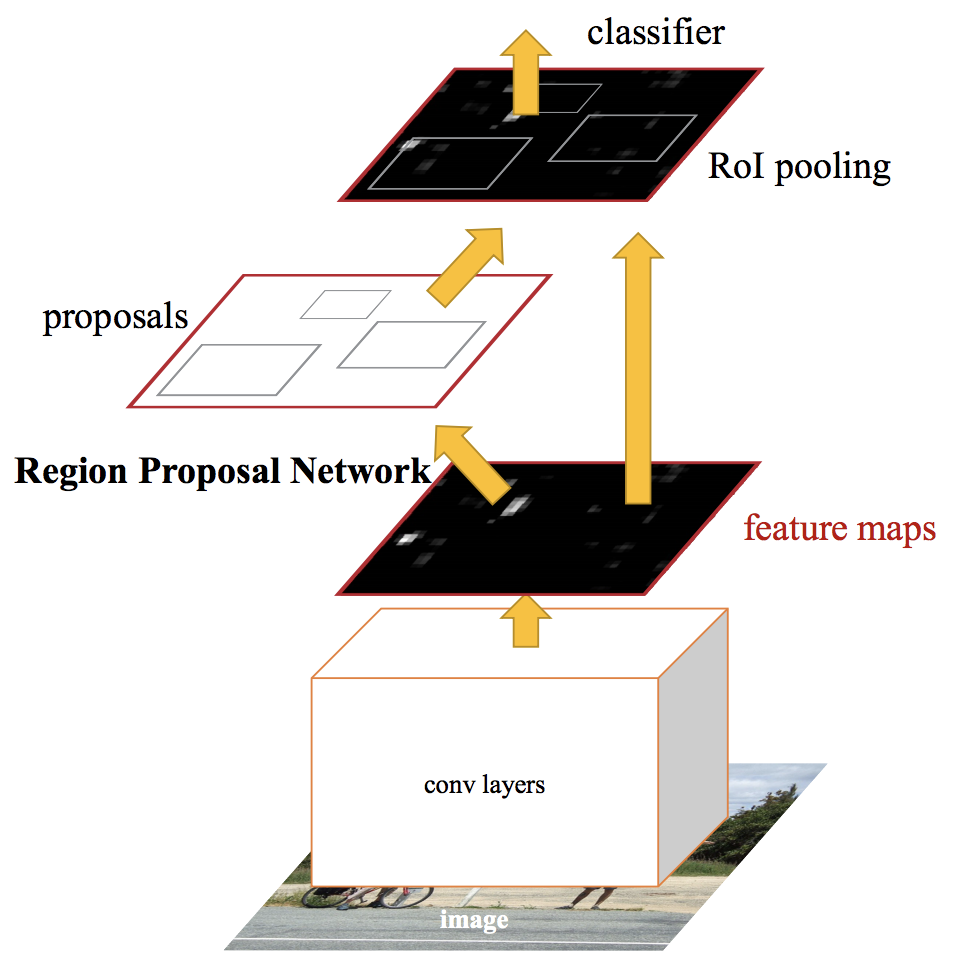

Но в этих нейронных сетях есть две ключевые проблемы: они не смотрят на картинку «полностью», а только на отдельные регионы, и они относительно медленные.

В чем же крутость YOLO? В том, что эта архитектура не имеет двух проблем свыше, и она доказала неоднократно свою эффективность.

Вообще архитектура YOLO в первых блоках не сильно отличается по «логике блоков» от других детекторов, то есть на вход подается картинка, дальше создаются feature maps с помощью CNN (правда в YOLO используется своя CNN под названием Darknet-53), затем эти feature maps определенным образом анализируются (об этом чуть позже), выдавая на выходе позиции и размеры bounding boxes и классы, которым они принадлежат.

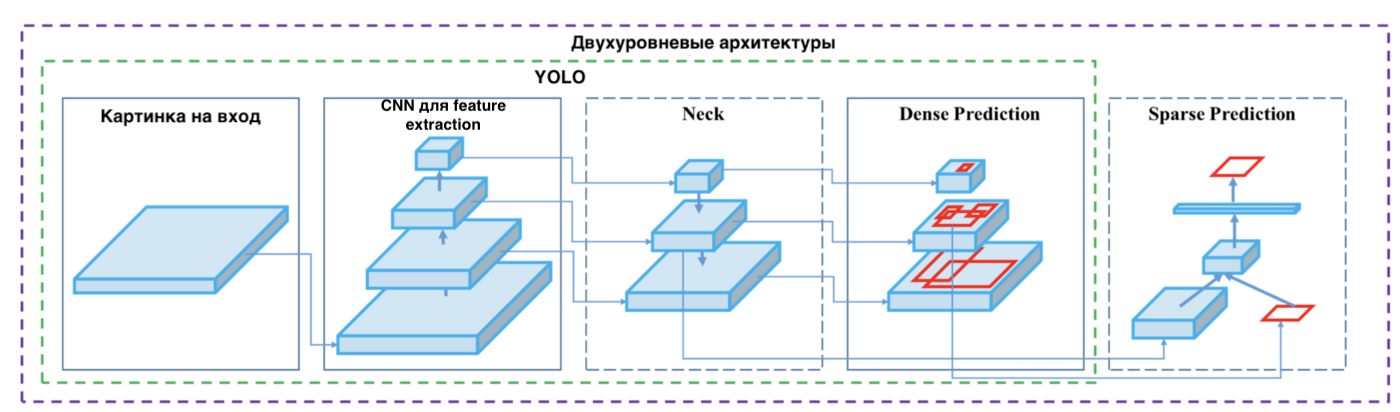

Но что такое Neck, Dense Prediction и Sparse Prediction?

С Sparse Prediction мы разобрались немного ранее — это просто повторение того, как двухуровневые алгоритмы работают: определяют по отдельности регионы и затем классифицируют эти регионы.

Neck (или «шея») — это отдельный блок, который создан для того, чтобы агрегировать информацию от отдельных слоев с предыдущих блоков (как показано на рисунке выше) для увеличения аккуратности предсказания. Если Вас заинтересовало это — можете погуглить термины «Path Aggregation Network», «Spatial Attention Module» и «Spatial Pyramid Pooling».

И, наконец, то, что отличает YOLO от всех других архитектур — блок под названием (на нашей картинке выше) Dense Prediction. На нем мы сфокусируемся чуть сильнее, потому что это очень интересное решение, которое как раз позволило YOLO вырваться в лидеры по эффективности определения объектов.

YOLO (You Only Look Once) несет в себе философию смотреть на картинку один раз, и за этот один просмотр (то есть один прогон картинки через одну нейронную сеть) делать все необходимые определения объектов. Как это происходит?

Что делает YOLO когда учится на данных (простыми словами):

Шаг 1: Обычно картинки решейпят под размер 416x416 перед началом обучения нейронной сети, чтобы можно было их подавать батчами (для ускорения обучения).

Шаг 2: Делим картинку (пока что мысленно) на клетки размером axa. В YOLOv3-4 принято делить на клетки размером 13x13.

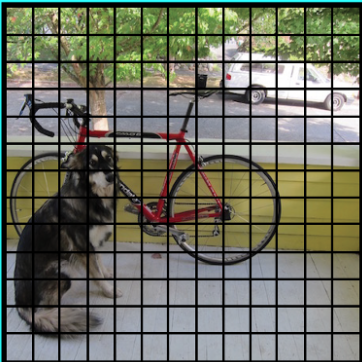

Теперь фокусируемся на эти клеточках, на которые мы разделили картинку/кадр. Такие клетки, которые называются grid cells, лежат в основе идеи YOLO. Каждая клетка является «якорем», к которому прикрепляются bounding boxes. То есть вокруг клетки рисуются несколько прямоугольников для определения объекта (поскольку непонятно, какой формы прямоугольник будет наиболее подходящим, их рисуют сразу несколько и разных форм), и их позиции, ширина и высота вычисляются относительно центра этой клетки.

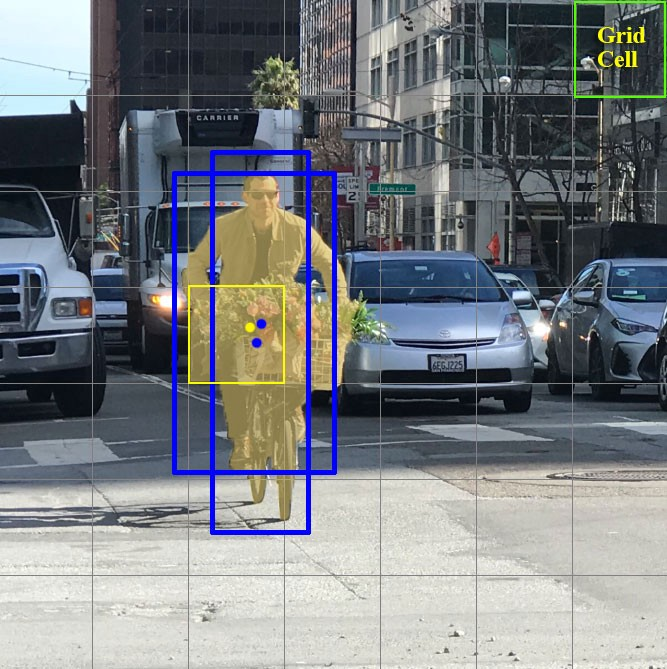

Как же рисуются эти прямоугольники (bounding boxes) вокруг клетки? Как определяется их размер и позиция? Здесь в борьбу вступает техника anchor boxes (в переводе — якорные коробки, или «якорные прямоугольники»). Они задаются в самом начале либо самим пользователем, либо их размеры определяются исходя из размеров bounding boxes, которые есть в датасете, на котором будет тренироваться YOLO (используется K-means clustering и IoU для определения самых подходящих размеров). Обычно задают порядка 3 различных anchor boxes, которые будут нарисованы вокруг (или внутри) одной клетки:

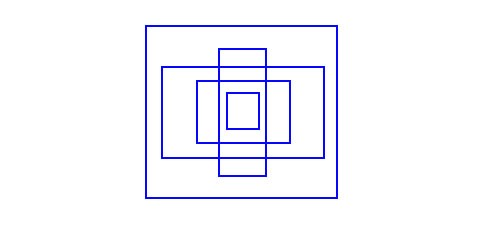

Шаг 3. Картинка из датасета прогоняется через нашу нейронную сеть (заметим, что кроме картинки в тренировочном датасете у нас должны быть определенны позиции и размеры настоящих bounding boxes для объектов, которые есть на ней. Это называется «аннотация» и делается это в основном вручную).

Давайте теперь подумаем, что нам нужно получить на выходе.

Для каждой клетки, нам нужно понять две принципиальные вещи:

  Какой из anchor boxes, из 3 нарисованных вокруг клетки, нам подходит больше всего и как его можно немного подправить для того, чтобы он хорошо вписывал в себя объект
  Какой объект находится внутри этого anchor box и есть ли он вообще

Какой же должен быть тогда output у YOLO?

1. На выходе для каждой клетки мы хотим получить:

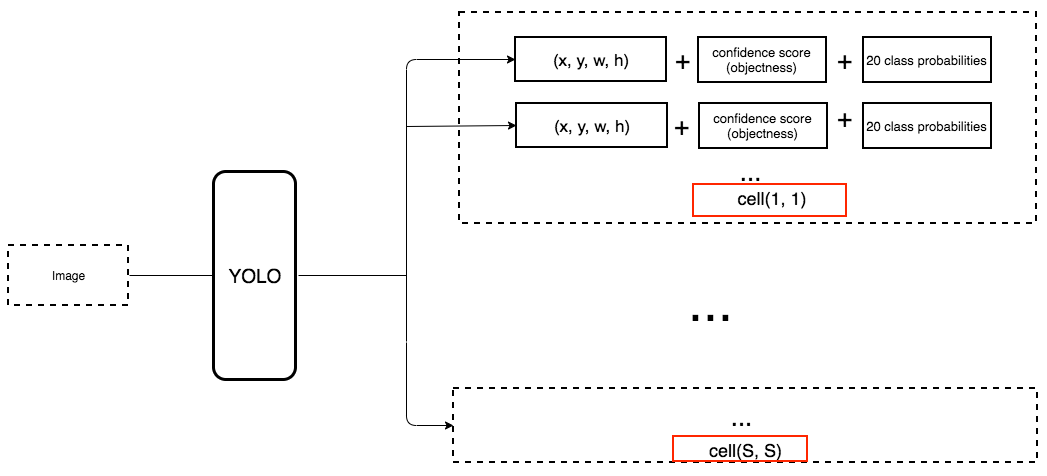

2. Output должен включать в себя вот такие параметры:

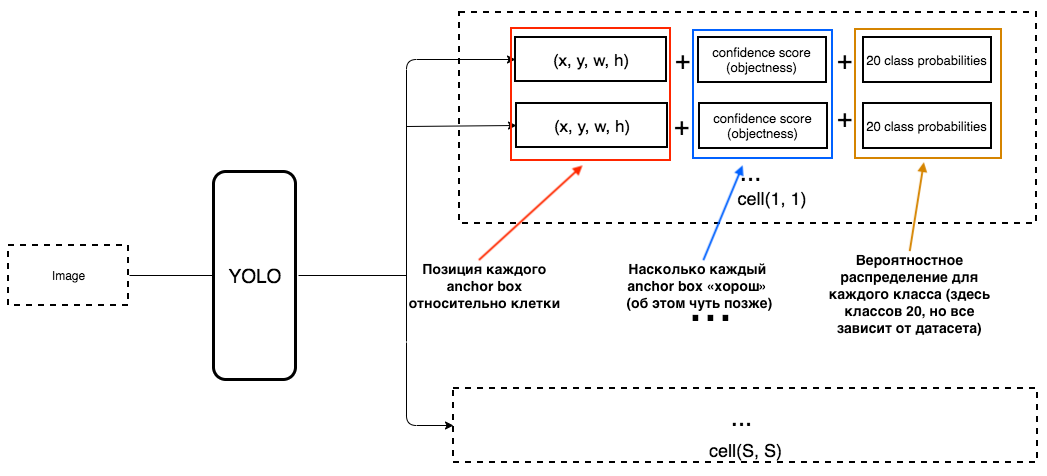

Как определяется objectness? На самом деле этот параметр определяется с помощью метрики IoU во время обучения. Метрика IoU работает так:

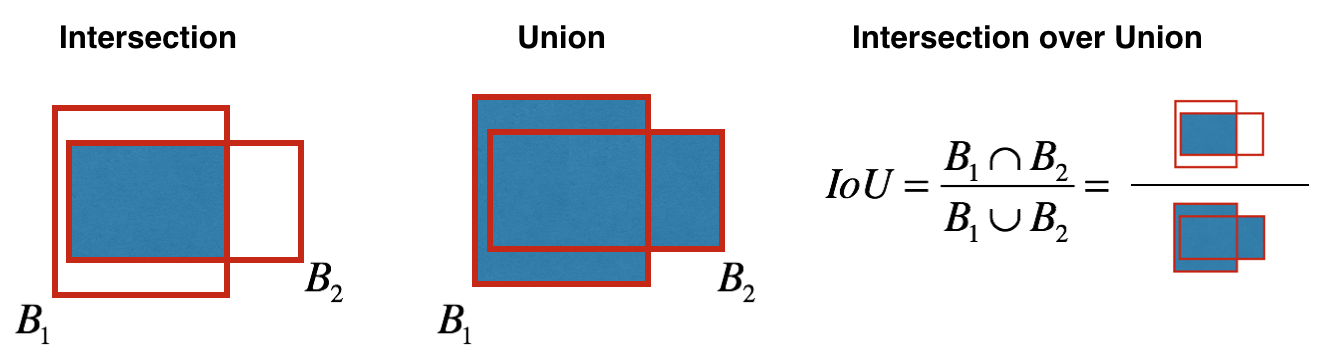

В начале Вы можете выставить порог для этой метрики, и если Ваш предсказанный bounding box будет выше этого порога, то у него будет objectness равной единице, а все остальные bounding boxes, у которых objectness ниже, будут исключены. Эта величина objectness понадобится нам, когда мы будем считать общий confidence score (на сколько мы уверены, что это именно нужный нам объект расположен внутри предсказанного прямоугольника) у каждого определенного объекта.

А теперь начинается самое интересное. Представим, что мы создатели YOLO и нам нужно натренировать ее на то, чтобы распознавать людей на кадре/картинке. Мы подаем картинку из датасета в YOLO, там происходит feature extraction в начале, а в конце у нас получается CNN слой, который рассказывает нам о всех клеточках, на которые мы «разделили» нашу картинку. И если этот слой рассказывает нам «неправду» о клеточках на картинке, то у нас должен быть большой Loss, чтобы потом его уменьшать при подаче в нейронную сеть следующих картинок.

Чтобы было совсем понятно, есть очень простая схема с тем, как YOLO создает этот последний слой:

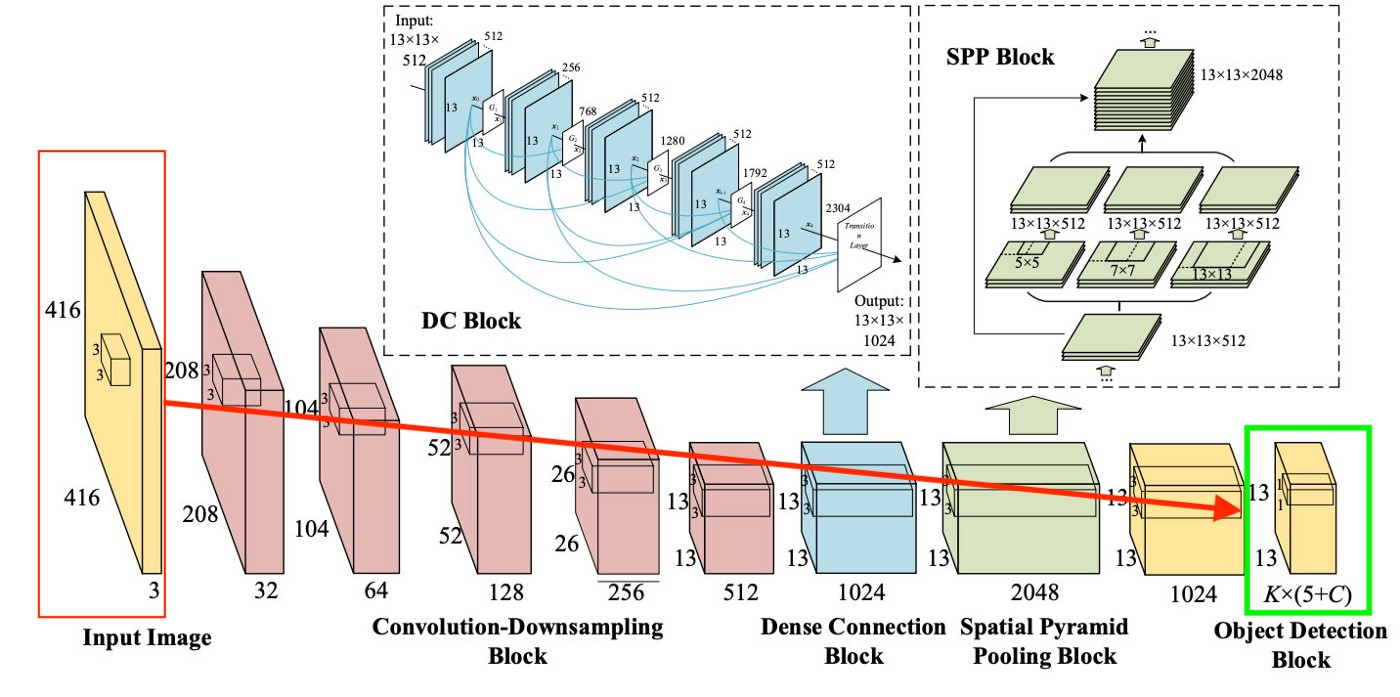

Как мы видим из картинки, этот слой, размером 13x13 (для картинок изначального размера 416x416) для того, чтобы рассказывать про «каждую клетку» на картинке. Из этого последнего слоя и достается информация, которую мы хотим.

## Задание №2.

**Запустите детектор (ssdMobile_v2 или faster_rcnn, или любой другой детектор) для своей картинки и попробуйте найти 10 объектов, 100 объектов.**

In [2]:
#Импорт всего

# Currently %tensorflow_version 2.x installs beta1, which doesn't work here.
# %tensorflow_version can likely be used after 2.0rc0  
#!pip install tf-nightly-gpu-2.0-preview
#!pip install tf-nightly-gpu-2.0-preview
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow

import tensorflow as tf

# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time
%matplotlib inline

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

The following GPU devices are available: /device:GPU:0


In [3]:
from google.colab import files
import cv2 as cv

In [4]:
files.upload()

Saving 33880796868_57b906cdc6_b.jpg to 33880796868_57b906cdc6_b.jpg


{'33880796868_57b906cdc6_b.jpg': b'\xff\xd8\xff\xe1\x00(Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x01\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\x1a\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xed\x00\x86Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00i\x1c\x01Z\x00\x03\x1b%G\x1c\x01\x00\x00\x02\x00\x04\x1c\x02\x00\x00\x02\x00\x04\x1c\x02\xe6\x00Ghttps://flickr.com/e/Zpf%2BpekDlu0qaHWi2zjV6iOIo%2Ffl46zaUc6hugMUsX8%3D\x1c\x02\x00\x00\x02\x00\x04\x00\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01

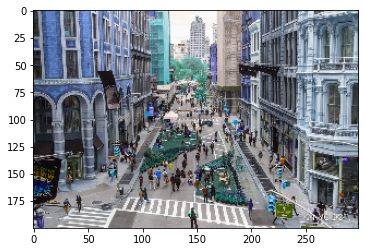

In [5]:
#Читаем картинку
im = cv.imread('/content/33880796868_57b906cdc6_b.jpg')
# размеры изображения
newH = 200  #высота
newW = int(im.shape[1]*200/im.shape[0]) # ширина 
#сжатая картинка
im = cv.resize(im, (newW, newH)) 
#Выводим 

plt.imshow(im)
plt.show()

In [6]:
#Настройка модели
cv.setUseOptimized(True) #режим оптимизации
cv.setNumThreads(6)      #количество потоков

In [7]:
# Объект Selective Search Segmentation
sss = cv.ximgproc.segmentation.createSelectiveSearchSegmentation()

# запускаем с картинкой
sss.setBaseImage(im)
  
# Выбираем точный метод 
sss.switchToSelectiveSearchQuality()

# Делаем selective search segmentation 
rects = sss.process() 
#вернёт массив прямоугольников, гдевозможно что-то есть
print(rects.shape) #число найденых объектов

(4649, 4)


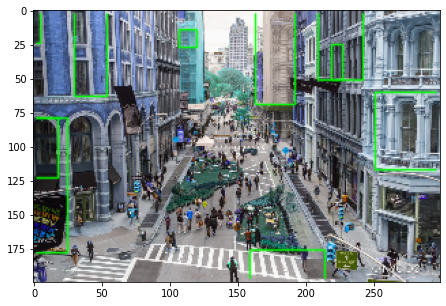

In [8]:
#Построим области

num_Rects = 10 #число выводимых region proposals (прямоугольников)

#создаем копию исходной картинки
im_ = im.copy()

for i, rect in enumerate(rects): 
  if (i < num_Rects): #пока не больше 
    # x,y - координаты левого верхнего угла; w, h - ширина и высота области
    x, y, w, h = rect
    # рисуем рамку      
    cv.rectangle(im_, (x, y), (x+w, y+h), (0, 255, 0), 1, cv.LINE_AA) 
  else: 
    break 

# Рисуем на экран
plt.figure(figsize=(16,5))
plt.imshow(im_) 
plt.show()

In [9]:
root_path = './' #change dir to your project folder 

In [10]:
# выводит картинку
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

#  Грузим и обрабатываем картинку
def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  #read image
  image_data = BytesIO(image_data)
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90)
  #print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

#  Рисуем рамку на изображении
def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  """Adds a bounding box to an image."""
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  # If the total height of the display strings added to the top of the bounding
  # box exceeds the top of the image, stack the strings below the bounding box
  # instead of above.
  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  # Each display_str has a top and bottom margin of 0.05x.
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = bottom + total_display_str_height
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

#  Рисуем все рамки
# max_boxes - максимальное число объектов для отображения, min_score=0.01 - минимакльная точность их детекции
# можно менять

def draw_boxes(image, boxes, class_names, scores, max_boxes=3, min_score=0.01):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

In [11]:
def load_img(path):
  # path - маршрут и имя файла для обработки

  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  # вернет картинку как тензор
  return img

In [12]:
#  Найдем рамку
# max_boxes - максимальное число объектов для отображения, min_score=0.0 - минимакльная точность их детекции
# можно менять
def get_bounding_box_on_image(image, boxes, class_names, scores, max_boxes=100, min_score=0.1):
  """
  Overlay labeled boxes on an image with formatted scores and label names.
  image - картинка, 
  boxes - рамки, 
  class_names - имена классов, 
  scores - оценка качества классификации для отбора рамок

  """
  if len(image.shape)>3:
    image=image.reshape(image.shape[-3],image.shape[-2],image.shape[-1])
  I_shape=np.uint8(image).shape
  #print(I_shape)
  im_array=[]
  for i in range(min(boxes.shape[0], max_boxes)): 
    #print(tuple(boxes[i]))
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])


      yminI = np.int(ymin*I_shape[0])
      ymaxI = np.int(ymax*I_shape[0])
      xminI = np.int(xmin*I_shape[1])
      xmaxI = np.int(xmax*I_shape[1])
      imf = np.array(image)[yminI:ymaxI,xminI:xmaxI,:]
      #print(imf.shape,imf[0,0,:])
      
      im_array.append(imf.copy())  
  return im_array

In [13]:
#  Вернем рамки
def get_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
 
  image_pil = np.array(image)
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      
      imf= get_bounding_box_on_image(image_pil, boxes, class_names, scores, max_boxes=max_boxes, min_score=0.1)
     
  return imf

In [14]:
module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1" #@param ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]

detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [15]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [16]:
def run_detector(detector, path, max_boxes):
  '''
  1)вызывает детектор с картинкой
  2) выводит результат на картинке

  detector - объект детектор, 
  path - маршрут и имя файла для обработки
  '''
  img = load_img(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()
  #print(result['detection_scores'])
  result = {key:value.numpy() for key,value in result.items()} 

  #max_boxes - максимальное число объектов для отображения, min_score=0.0 - минимакльная точность их детекции 
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"], max_boxes)

  display_image(image_with_boxes)
  return result

In [17]:
import os, fnmatch
listOfFiles = os.listdir(root_path)
pattern = '*.jpg'
List_name=[]
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
            List_name.append(np.array(root_path+entry))
List_name[0]


array('./33880796868_57b906cdc6_b.jpg', dtype='<U30')

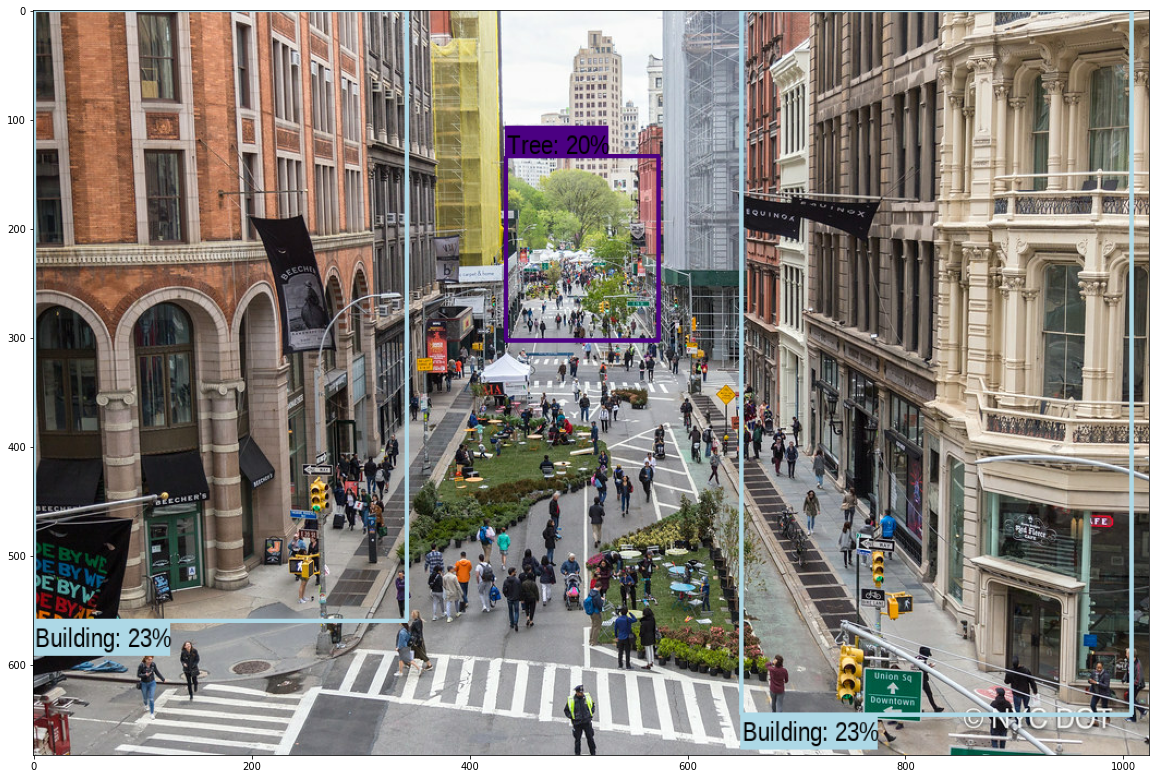

In [18]:
result = run_detector(detector, List_name[0], max_boxes=3)

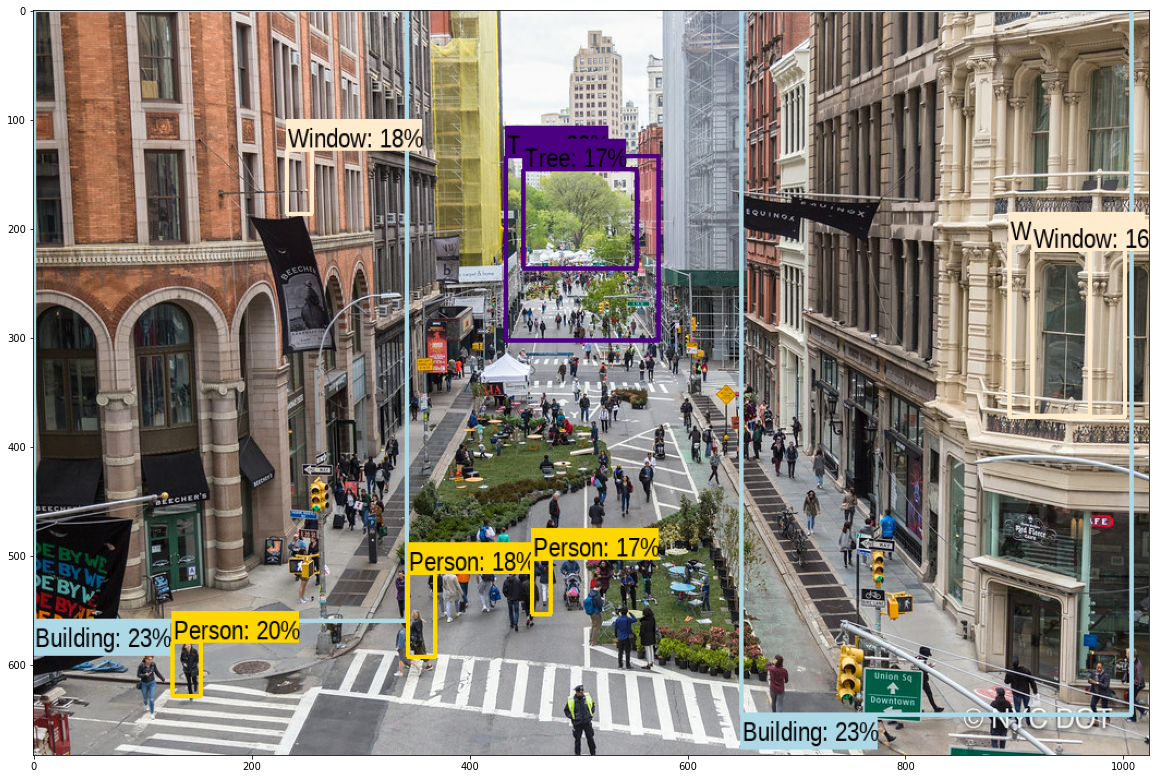

In [19]:
result = run_detector(detector, List_name[0], max_boxes=10)

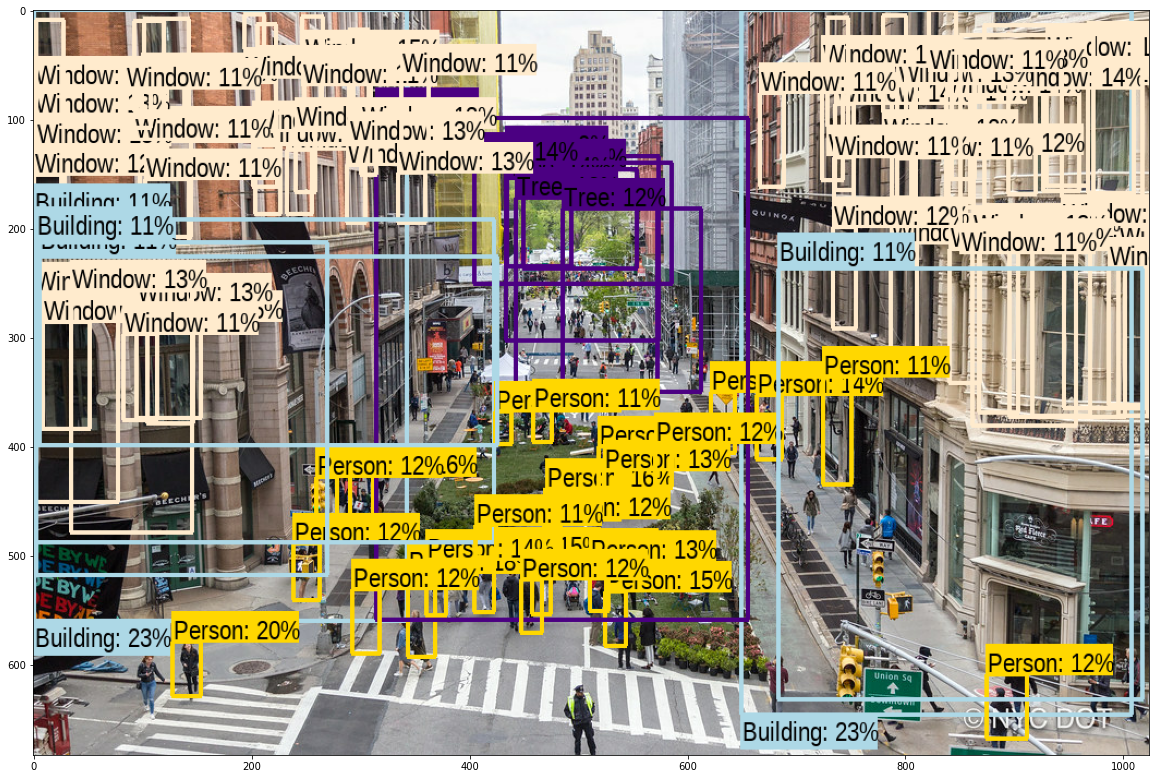

In [20]:
result = run_detector(detector, List_name[0], max_boxes=100)